In [1]:
# Load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [3]:
# Load the data

df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Week,Dayofweek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2,3


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(C)             8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Month                      8760 non-null   int64  
 12  Week                       8760 non-null   int64  
 13  Dayofweek                  8760 non-null   int64

In [6]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(C)               0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Month                        0
Week                         0
Dayofweek                    0
dtype: int64

In [7]:
# Split the data into two DataFrames: X (features) and y (target variable)

X = df.iloc[:, 1:]  # Specify at least one column as a feature
y = df["Rented Bike Count"]  # Specify one column as the target variable

In [8]:
# Split the data into train and test subsets
# Adjust the test size and random state

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 13), (1752, 13), (7008,), (1752,))

In [10]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting

params = {
    "n_estimators": 100,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 4,  # Min number of samples required to split a node
    "min_samples_leaf": 2,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a RandomForestRegressor object with the parameters above

rf = RandomForestRegressor(**params)

In [11]:
# Train the random forest on the train set

rf = rf.fit(X_train, y_train)

In [12]:
# Predict the outcomes on the test set

y_pred = rf.predict(X_test)
y_pred

array([ 292.46443837, 1175.59121481,  537.11062829, ...,  569.03386724,
        949.86808847,  938.5899868 ])

In [13]:
# Evaluate performance with error metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 168.5730169335061
Mean Squared Error: 85344.593930353
Root Mean Squared Error: 292.13797070965114


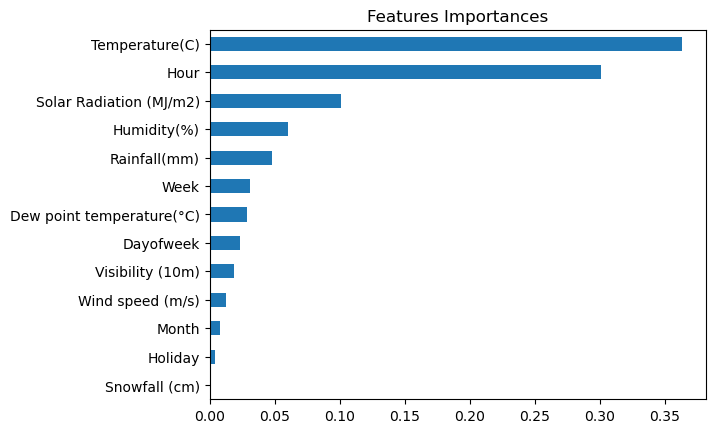

In [14]:
# In RandomForestRegressor, there is a property called feature_importances_ which holds the Gini importance of each feature (the higher this value, the more important the feature). We can list and plot feature_importances_ to see which features influence predictions most.

# Create a sorted Series of features importances

importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

In [15]:
# Hyperparameter tuning with Random Search

# Define a parameter grid with distributions of possible parameters to use

rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor

rf = RandomForestRegressor(random_state=13)

In [16]:
# Instantiate RandomizedSearchCV() with rf and the parameter grid

rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    scoring="neg_mean_absolute_error",  # Metric to evaluate performance
    random_state=13
)

In [17]:
# Train the model on the training set

rf_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=140; total time=   1.2s
[CV] END ccp_alpha=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=140; total time=   1.2s
[CV] END ccp_alpha=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=140; total time=   1.2s
[CV] END ccp_alpha=0.001, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=174; total time=   2.2s
[CV] END ccp_alpha=0.001, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=174; total time=   2.4s
[CV] END ccp_alpha=0.001, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=174; total time=   2.3s
[CV] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=189; total time=   1.6s
[CV] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=189; total time=   1.6s
[CV] END c

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=13),
                   param_distributions={'ccp_alpha': [0, 0.001, 0.01, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47, 48, 49, ...]},
                   random_state=13, scoring='neg_mean_absolute_error',
                   verbose=2)

In [18]:
# Print the best parameters and highest accuracy

print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Best parameters found:  {'n_estimators': 94, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'ccp_alpha': 0.001}
Best performance:  -168.9036149349852
